It appears that across all of the charts, the mice treated with Capomulin fared better in terms of the results being tested for; they experienced a decrease in overall tumor volume, had fewer metastatic sites developing, and had a greater number of subjects surviving until the end of the trials. 

Mice treated with Ketapril and the Placebo appear to have nearly similar rates of both change in tumor volume and number metastatic sites, especially when considering the frequency of which the error bars between the two groups overlapped. In addition, both groups had nearly the same amount of mice surviving until the end of the trial (Keta:42%, Plac: 44% ).

It is interesting to observe that mice treated with Infubinol experienced lower rates of tumor volume growth and fewer metastatic sites but had the lowest survival rate of any group at 36%. Additional information about the possible side effects and  potential risks of Infubinol would be needed in order to further analyze this trend.

In [18]:
#Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#file to load
path = 'data/mouse_drug_data.csv'
path2 = 'data/clinicaltrial_data.csv'

#Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(path)
clinical_data = pd.read_csv(path2)

combined_data = pd.merge(mouse_data, clinical_data, on='Mouse ID', how='outer')
combined_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [19]:
stel = combined_data.loc[combined_data['Drug'] == 'Stelasyn', :]
testing = stel.groupby('Timepoint')['Mouse ID'].count()
#survival = []
survival = [round((i/testing[0])*100,2) for i in testing]
#survival
timepoints = stel['Timepoint'].unique()

#for i in testing:
    #survival.append((i/testing[0])*100)
#new = [timepoints, survival]
#newer = pd.concat(new, axis=1)

total_num_mice = round(((testing.head(10))/testing[0])*100,2)
testing
#survival
#new.dtypes
#testing['Testings'] =  testing[0]
max_mice = total_num_mice[0]
total_num_mice

Timepoint
0     100.00
5      96.15
10     88.46
15     88.46
20     80.77
25     73.08
30     69.23
35     61.54
40     46.15
45     42.31
Name: Mouse ID, dtype: float64

In [20]:
#Ketapril
keta = combined_data.loc[combined_data['Drug'] == 'Ketapril', :]
keta_vol = keta.groupby('Timepoint')['Tumor Volume (mm3)'].mean()
keta_sem = keta.groupby('Timepoint')['Tumor Volume (mm3)'].sem()

#Changes in Metastic sites based on Drugs
keta_met = keta.groupby('Timepoint')['Metastatic Sites'].mean()
keta_met_sem = keta.groupby('Timepoint')['Metastatic Sites'].sem()

#Survival Rates
keta_mice = keta.groupby('Timepoint')['Mouse ID'].count() 
#keta_surv = round(((keta_mice.head(10))/keta_mice[0])*100,2)
keta_surv = (keta_mice.head(10)/keta_mice[0])*100
keta_surv

Timepoint
0     100.0
5      92.0
10     88.0
15     76.0
20     76.0
25     76.0
30     72.0
35     68.0
40     60.0
45     44.0
Name: Mouse ID, dtype: float64

In [21]:
#Capomulin
capo = combined_data.loc[combined_data['Drug'] == 'Capomulin', :]
capo_vol = capo.groupby('Timepoint')['Tumor Volume (mm3)'].mean()
capo_sem = capo.groupby('Timepoint')['Tumor Volume (mm3)'].sem()

#Changes in Metastic sites based on Drugs
capo_met = capo.groupby('Timepoint')['Metastatic Sites'].mean()
capo_met_sem = capo.groupby('Timepoint')['Metastatic Sites'].sem()

#Survival Rates
capo_mice = capo.groupby('Timepoint')['Mouse ID'].count() 
capo_surv = (capo_mice.head(10)/capo_mice[0])*100

In [22]:
#Infubinol
infu = combined_data.loc[combined_data['Drug'] == 'Infubinol', :]
infu_vol = infu.groupby('Timepoint')['Tumor Volume (mm3)'].mean()
infu_sem = infu.groupby('Timepoint')['Tumor Volume (mm3)'].sem()

#Changes in Metastic sites based on Drugs
infu_met = infu.groupby('Timepoint')['Metastatic Sites'].mean()
infu_met_sem = infu.groupby('Timepoint')['Metastatic Sites'].sem()

#Survival Rates
infu_mice = infu.groupby('Timepoint')['Mouse ID'].count() 
infu_surv = (infu_mice.head(10)/infu_mice[0])*100

In [23]:
#Placebo
plac = combined_data.loc[combined_data['Drug'] == 'Placebo', :]
plac_vol = plac.groupby('Timepoint')['Tumor Volume (mm3)'].mean()
plac_sem = plac.groupby('Timepoint')['Tumor Volume (mm3)'].sem()

#Changes in Metastic sites based on Drugs
plac_met = plac.groupby('Timepoint')['Metastatic Sites'].mean()
plac_met_sem = plac.groupby('Timepoint')['Metastatic Sites'].sem()

#Survival Rates
plac_mice = plac.groupby('Timepoint')['Mouse ID'].count() 
plac_surv = (plac_mice.head(10)/plac_mice[0])*100
the = np.shape(plac_surv)


In [24]:
infu_surv

Timepoint
0     100.0
5     100.0
10     84.0
15     84.0
20     80.0
25     72.0
30     68.0
35     48.0
40     40.0
45     36.0
Name: Mouse ID, dtype: float64

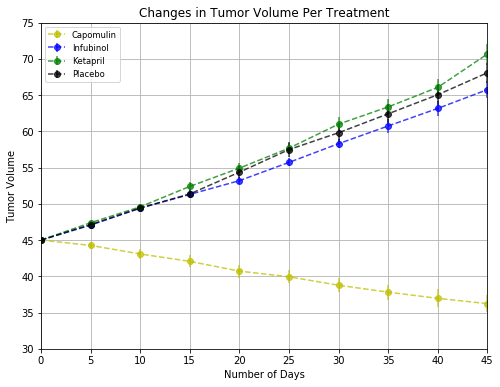

In [25]:
# Tumor Volume Change
x_axis = np.arange(0,50, 5)
fig, ax = plt.subplots(figsize=(8,6))

ax.errorbar(x_axis, capo_vol, yerr=capo_sem, fmt='--o', color='y', alpha=0.75, label='Capomulin')
ax.errorbar(x_axis, infu_vol, yerr=infu_sem, fmt='--o', color='b', alpha=0.75, label='Infubinol')
ax.errorbar(x_axis, keta_vol, yerr=keta_sem, fmt='--o', color='g', alpha=0.75, label='Ketapril')
ax.errorbar(x_axis, plac_vol, yerr=plac_sem, fmt='--o', color='k', alpha=0.75, label='Placebo')

ax.set_xlabel('Number of Days')
ax.set_ylabel('Tumor Volume')

plt.title('Changes in Tumor Volume Per Treatment')
plt.legend(loc='best',fontsize='small')

ax.set_xlim(0, 45, 5)
ax.set_ylim(30, 75, 5)
ax.grid()


plt.show()

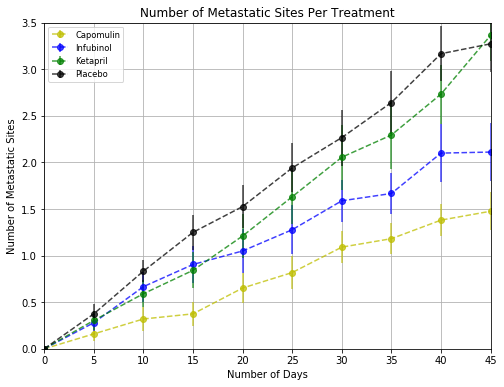

In [26]:
#Metastatic Site Change
x_axis = np.arange(0,50,5)
fig, ax = plt.subplots(figsize=(8,6))

ax.errorbar(x_axis, capo_met, yerr=capo_met_sem, fmt='--o', color='y', alpha=0.75, label='Capomulin')
ax.errorbar(x_axis, infu_met, yerr=infu_met_sem, fmt='--o', color='b', alpha=0.75, label='Infubinol')
ax.errorbar(x_axis, keta_met, yerr=keta_met_sem, fmt='--o', color='g', alpha=0.75, label='Ketapril')
ax.errorbar(x_axis, plac_met, yerr=plac_met_sem, fmt='--o', color='k', alpha=0.75, label='Placebo')


ax.set_xlabel('Number of Days')
ax.set_ylabel('Number of Metastatic Sites')

ax.grid()
ax.set_xlim(0, 45, 5)
ax.set_ylim(0, 3.5, 0.5)

plt.title('Number of Metastatic Sites Per Treatment')
plt.legend(loc='best', fontsize='small')

plt.show()

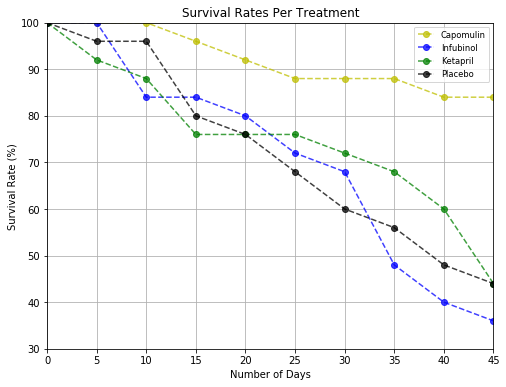

In [27]:
#Survival Rates
x_axis = np.arange(0,50,5)
fig, ax = plt.subplots(figsize=(8,6))



ax.errorbar(x_axis, capo_surv, fmt='--o', color='y', alpha=0.75, label='Capomulin')
ax.errorbar(x_axis, infu_surv, fmt='--o', color='b', alpha=0.75, label='Infubinol')
ax.errorbar(x_axis, keta_surv, fmt='--o', color='g', alpha=0.75, label='Ketapril')
ax.errorbar(x_axis, plac_surv, fmt='--o', color='k', alpha=0.75, label='Placebo')

ax.set_xlabel('Number of Days')
ax.set_ylabel('Survival Rate (%)')

ax.grid()
ax.set_xlim(0, 45, 5)
ax.set_ylim(30, 100, 10)

plt.title('Survival Rates Per Treatment')
plt.legend(loc='best', fontsize='small')

plt.show()




In [28]:
#Percentage Tumor Volume Change for Each Drug
drug_means = [capo_vol, infu_vol, keta_vol, plac_vol]
drug_chart = pd.concat(drug_means, axis=1)
drug_chart.columns = ['Campomulin', 'Infubinol', 'Ketapril', 'Placebo']

change_df = drug_chart.transpose()

change_df['Overall Change'] = round((((change_df[0] - change_df[45])/change_df[0])*100)*-1, 2)
#change_df['Overall Change'] = change_df['Overall Change'].map('{:,.2f}%'.format)
overall_change = change_df['Overall Change']
overall_change

Campomulin   -19.48
Infubinol     46.12
Ketapril      57.03
Placebo       51.30
Name: Overall Change, dtype: float64

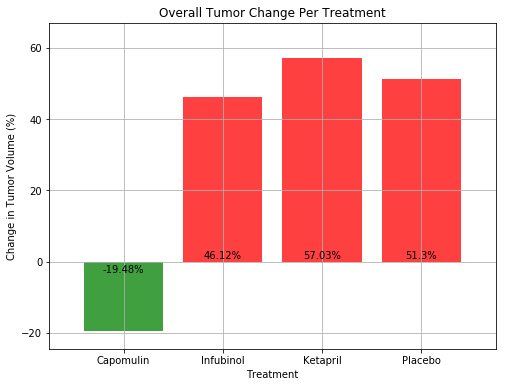

In [29]:
#Overall Tumor Volume Change Bar Graph
fig, ax = plt.subplots(figsize=(8,6))
x_axis = np.arange(len(overall_change))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, overall_change, alpha=0.75, align='center', color=['g', 'r', 'r', 'r'])
plt.xticks(tick_locations, ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(min(overall_change)-5, max(overall_change)+10)
plt.grid()

plt.xlabel('Treatment')
plt.ylabel('Change in Tumor Volume (%)')
plt.title('Overall Tumor Change Per Treatment')

for i, j in enumerate(overall_change):
    if j < 0:
        ax.text(i, -3, str(j) + '%', ha='center')
    else:
        ax.text(i, 1, str(j) + '%', ha='center')